In [9]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
%matplotlib inline

#lets load the dataset
digits = load_digits()

In [10]:
# now that we have loaded the dataset, lets see the images
# there are 1797 images of 8x8 pixels size
print("Image data shape",digits.data.shape)

# lets see how many data labels are there!
print("Image labels shape",digits.target.shape)

Image data shape (1797, 64)
Image labels shape (1797,)


In [12]:
# Splitting the Dataset into Training and Testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target,test_size=0.25,random_state=0)

In [13]:
# Step 1 : Import the model that you want to use
from sklearn.linear_model import LogisticRegression

In [14]:
# Step 2 : Make an instance of the model
lr = LogisticRegression()

In [16]:
# Step 3 : Training the model on the data, storing the information learned from the data
# Here model is learning the relationship between x(digits) and y(labels)
# FIT the model
lr.fit(x_train,y_train)

c:\users\gshar\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\gshar\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
# Step 4 : Predict the labels of new data (new images)
# Uses the information the model during the model training process
# This will return a numpy array
# PREDICT for One observation (image)
lr.predict(x_test[0].reshape(1,-1))

array([2])

In [31]:
# Predict for Multiple Observations 
lr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [41]:
# Predict for the entire dataset
predictions  = lr.predict(x_test)

In [34]:
# Measuring the model's peformance
# While there are many ways of doing this, we are going to keep this simple.
# We will calculate accuracy as correction predictions/total number of data points

In [36]:
# use SCORE method to get accuracy of the model
score =  lr.score(x_test,y_test)
print(score)

0.9533333333333334


In [38]:
# Confusion Matrix
# A confusion matrix is a table that is often used to describe the peformance of a classification model (or classifier)
# on a set of test data for which the values are known. There are two python packages for making Confusion Matrix
# Seaborn and Matplotlib

In [40]:
import numpy as np
import seaborn as sns
from sklearn import metrics

In [42]:
# Method 1 : Seaborn
cm = metrics.confusion_matrix(y_test,predictions)

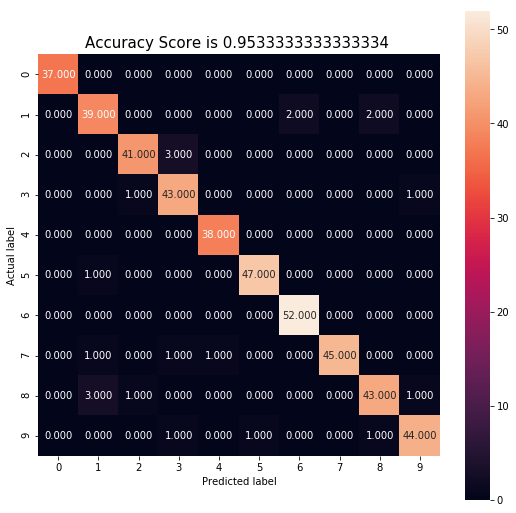

In [64]:
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt=".3f",square=True)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title("Accuracy Score is {0} ".format(score),size=15)
plt.savefig('Confusion Matrix.png')

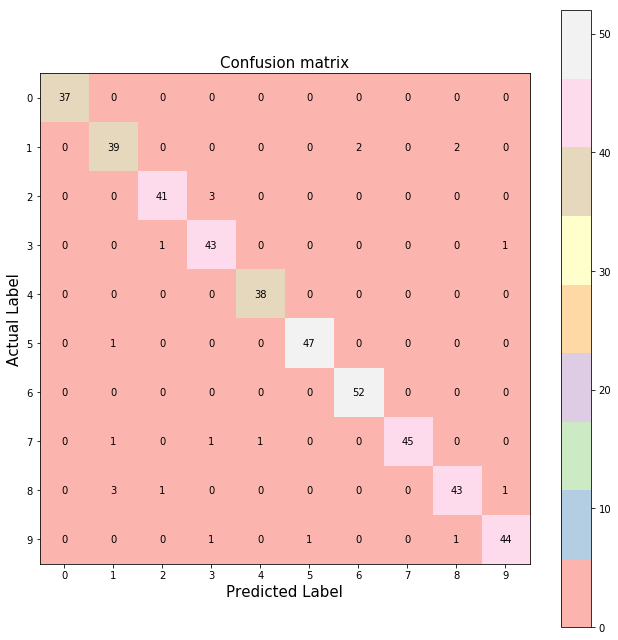

In [84]:
# Method 2 : Using Matplotlib
# This method involves a lot more coding
cm = metrics.confusion_matrix(y_test,predictions)
plt.figure(figsize=(9,9))
plt.imshow(cm,interpolation='nearest',cmap='Pastel1')
plt.title('Confusion matrix',size=15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks,["0","1","2","3","4","5","6","7","8","9"])
plt.yticks(tick_marks,["0","1","2","3","4","5","6","7","8","9"])
plt.tight_layout()
plt.ylabel('Actual Label',size = 15)
plt.xlabel('Predicted Label',size = 15)
width,height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]),xy=(y,x),horizontalalignment = "center",verticalalignment="center")
plt.savefig("Confusion Matrix Matplotlib.png")